In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=75cfce7386ebda4c7aec0492dadac4b571ca2e0b54354e5fda90bca1cde9fd20
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


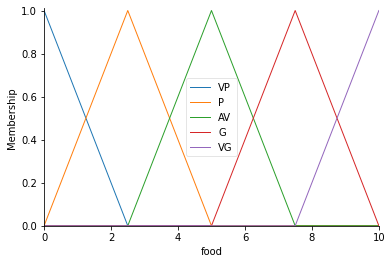

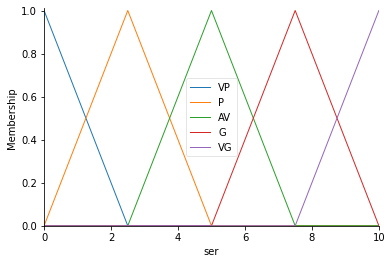

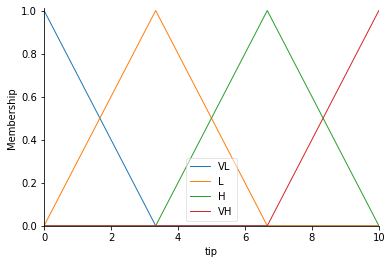

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,61)   #chia ra tu 10 > 10 có 61 độ phân giải
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
ser = ctrl.Antecedent(universe,'ser')
tip = ctrl.Antecedent(universe,'tip')

name_1 = ['VP','P','AV','G','VG']
name_2 = ['VL','L','H','VH']

food.automf(names = name_1)   #hàm chỉ tạo ra membership function là số lẻ
ser.automf(names = name_1)
tip.automf(names = name_2)

food.view()
ser.view()
tip.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,61)   #chia ra tu 10 > 10 có 61 độ phân giải
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
ser = ctrl.Antecedent(universe,'ser')
tip = ctrl.Antecedent(universe,'tip')

name_1 = ['VP','P','AV','G','VG']
name_2 = ['VL','L','H','VH']

food.automf(names = name_1)   #hàm chỉ tạo ra membership function là số lẻ
ser.automf(names = name_1)
tip.automf(names = name_2)

#food.view()
#ser.view()
#tip.view()

rule_VL = ctrl.Rule(antecedent= ((food['VP'] & ser['VP']) | (food['P'] & ser['VP']) | (food['AV'] & ser['VP']) | (food['G'] & ser['VP']) | (food['VG'] & ser['VP']) | (food['VP'] & ser['P']) | (food['P'] & ser['P']) | (food['VP'] & ser['P']) | (food['P'] & ser['P'])), consequent = tip['VL'], label = 'rule_VL')
rule_L = ctrl.Rule(antecedent= ((food['AV'] & ser['P']) | (food['G'] & ser['P']) | (food['VG'] & ser['P']) | (food['VP'] & ser['AV']) | (food['P'] & ser['AV']) | (food['AV'] & ser['AV']) | (food['G'] & ser['AV']) | (food['VG'] & ser['AV']) | (food['VP'] & ser['G']) | (food['P'] & ser['G']) | (food['VP'] & ser['VG']) | (food['P'] & ser['VG'])), consequent = tip['L'], label = 'rule_L')
rule_H = ctrl.Rule(antecedent= ((food['AV'] & ser['G']) | (food['G'] & ser['G']) | (food['VG'] & ser['G'])), consequent = tip['H'], label = 'rule_H')
rule_VH = ctrl.Rule(antecedent= ((food['AV'] & ser['VG']) | (food['G'] & ser['VG']) | (food['VG'] & ser['VG'])), consequent = tip['H'], label = 'rule_HL')

systems_1 = ctrl.ControlSystem([rule_L, rule_VL, rule_VH, rule_H])
tipping_systems = ctrl.ControlSystemSimulation(systems_1, flush_after_run=61*61+1) 
 # Tinh toan va gan bien mo phong
upsampled = np.linspace(0,10,61)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(61):
    for j in range(61):       
        tipping_systems.input['food'] = x[i,j]
        tipping_systems.input['service'] = y[i,j]
        tipping_systems.compute()
        z[i,j] = tipping_systems.output['tip']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, property = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap  = 'virius', linewidth = 0.4, antialiased = Time)

cset = ax.contourf(x, y, z, zdir = 'z', offset = 9, cmap  = 'virius', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offset = 11, cmap  = 'virius', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offset = 11, cmap  = 'virius', anpha = 0.5)

ax.view_init(30,200)

food.view()
service.view()
tip.view()

rule_VL.view()

plt.show()

ANFIS